In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [15]:
data['region'].value_counts().sort_values()

northeast    324
southwest    325
northwest    325
southeast    364
Name: region, dtype: int64

In [16]:
data['children'].value_counts().sort_values()

5     18
4     25
3    157
2    240
1    324
0    574
Name: children, dtype: int64

In [17]:
clean_data = {'sex': {'male' : 0 , 'female' : 1} ,
                 'smoker': {'no': 0 , 'yes' : 1},
                   'region' : {'northwest':0, 'northeast':1,'southeast':2,'southwest':3}
               }
data_copy = data.copy()
data_copy.replace(clean_data, inplace=True)
data_copy.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,0,21984.47061
4,32,0,28.880,0,0,0,3866.85520


In [18]:
data_copy.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,1.514948,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.105572,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


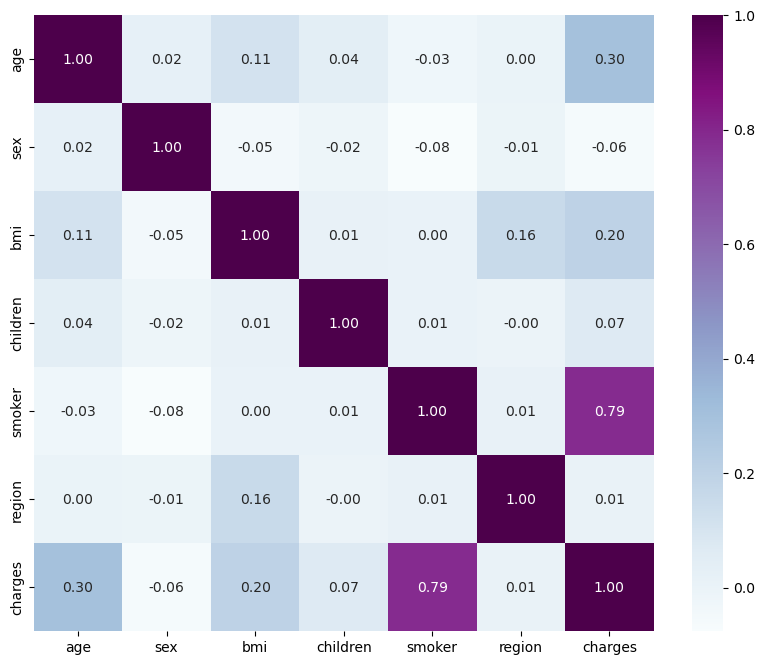

In [19]:
corr = data_copy.corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr,cmap='BuPu',annot=True,fmt=".2f",ax=ax)
plt.show()

Smoker, BMI and Age are most important factors that determnines charges

In [20]:
#Outliers
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)
outliers = data[(data['age'] < lower_bound) | (data['age'] > upper_bound)]

print(outliers)

Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []


In [21]:
#Outliers
Q1 = data['charges'].quantile(0.25)
Q3 = data['charges'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)
outliers = data[(data['charges'] < lower_bound) | (data['charges'] > upper_bound)]
print(outliers)

      age     sex     bmi  children smoker     region      charges
14     27    male  42.130         0    yes  southeast  39611.75770
19     30    male  35.300         0    yes  southwest  36837.46700
23     34  female  31.920         1    yes  northeast  37701.87680
29     31    male  36.300         2    yes  southwest  38711.00000
30     22    male  35.600         0    yes  southwest  35585.57600
...   ...     ...     ...       ...    ...        ...          ...
1300   45    male  30.360         0    yes  southeast  62592.87309
1301   62    male  30.875         3    yes  northwest  46718.16325
1303   43    male  27.800         0    yes  southwest  37829.72420
1313   19  female  34.700         2    yes  southwest  36397.57600
1323   42  female  40.370         2    yes  southeast  43896.37630

[139 rows x 7 columns]


In [22]:
print(data['sex'].value_counts().sort_values()) 
print(data['smoker'].value_counts().sort_values())
print(data['region'].value_counts().sort_values())

female    662
male      676
Name: sex, dtype: int64
yes     274
no     1064
Name: smoker, dtype: int64
northeast    324
southwest    325
northwest    325
southeast    364
Name: region, dtype: int64


<Axes: title={'center': 'Age vs Charge'}, xlabel='age', ylabel='charges'>

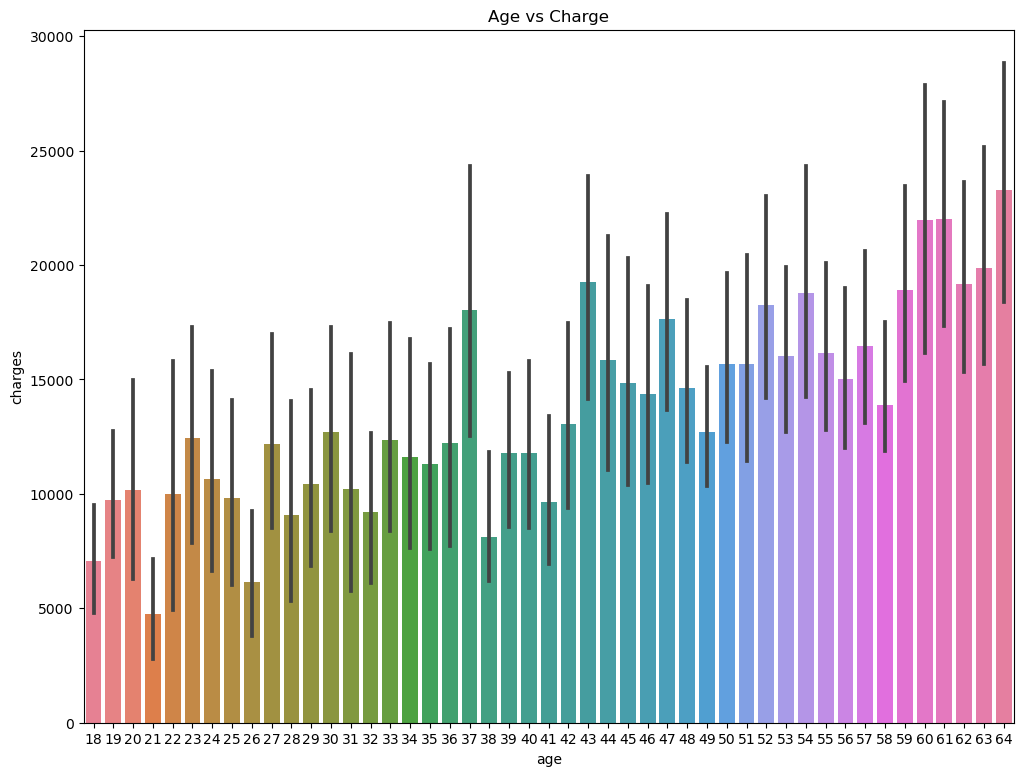

In [23]:
plt.figure(figsize=(12,9))
plt.title('Age vs Charge')
sns.barplot(x='age',y='charges',data=data_copy,palette='husl')

<Axes: title={'center': 'Region vs Charge'}, xlabel='region', ylabel='charges'>

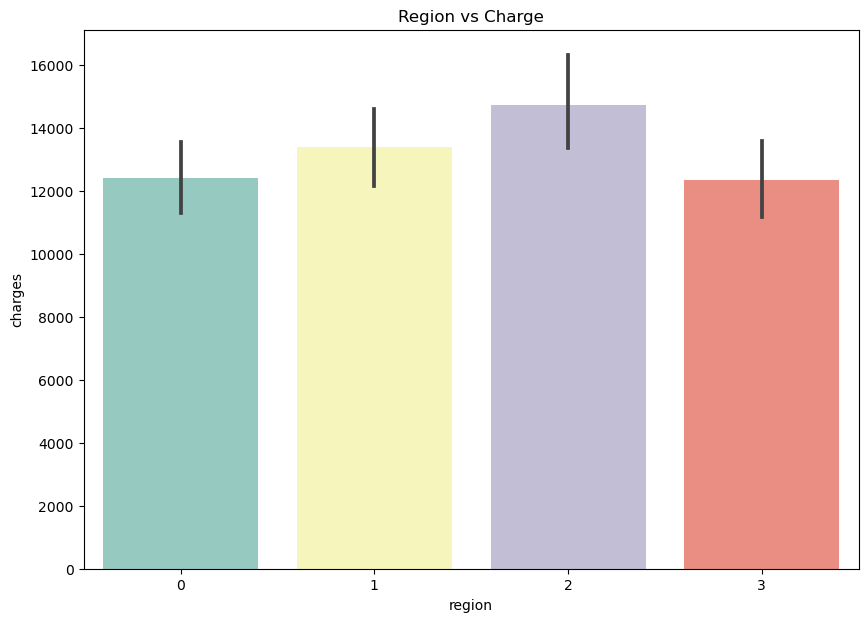

In [24]:
plt.figure(figsize=(10,7))
plt.title('Region vs Charge')
sns.barplot(x='region',y='charges',data=data_copy,palette='Set3')

Text(0.5, 1.0, 'BMI VS Charge')

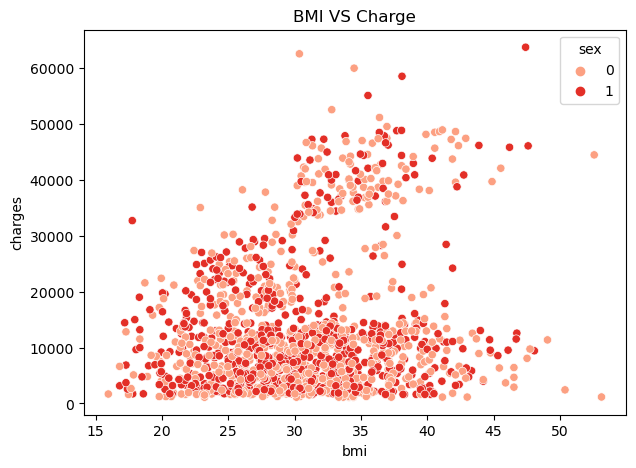

In [25]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='bmi',y='charges',hue='sex',data=data_copy,palette='Reds')
plt.title('BMI VS Charge')

<Axes: title={'center': 'Smoker vs Charge'}, xlabel='smoker', ylabel='charges'>

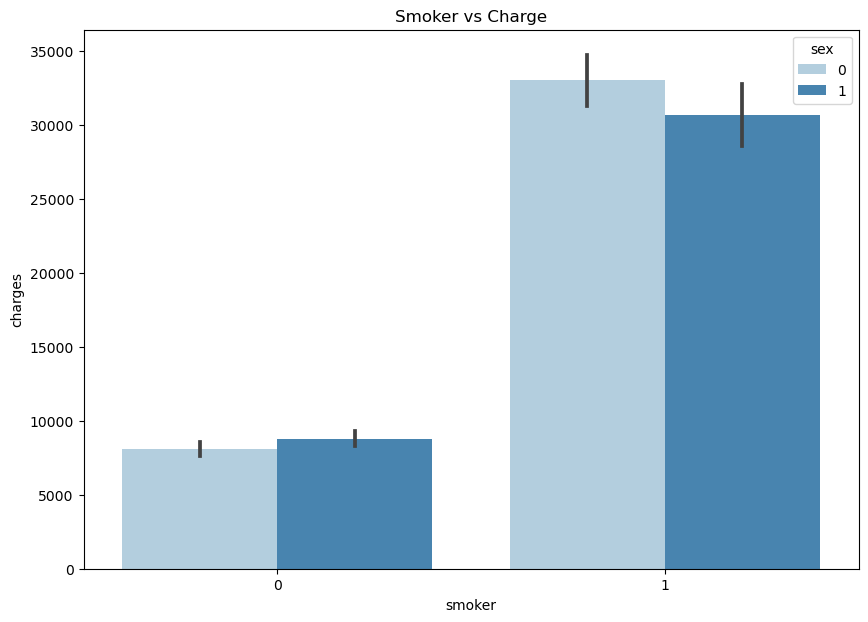

In [26]:
plt.figure(figsize=(10,7))
plt.title('Smoker vs Charge')
sns.barplot(x='smoker',y='charges',data=data_copy,palette='Blues',hue='sex')

<Axes: title={'center': 'Sex vs Charges'}, xlabel='sex', ylabel='charges'>

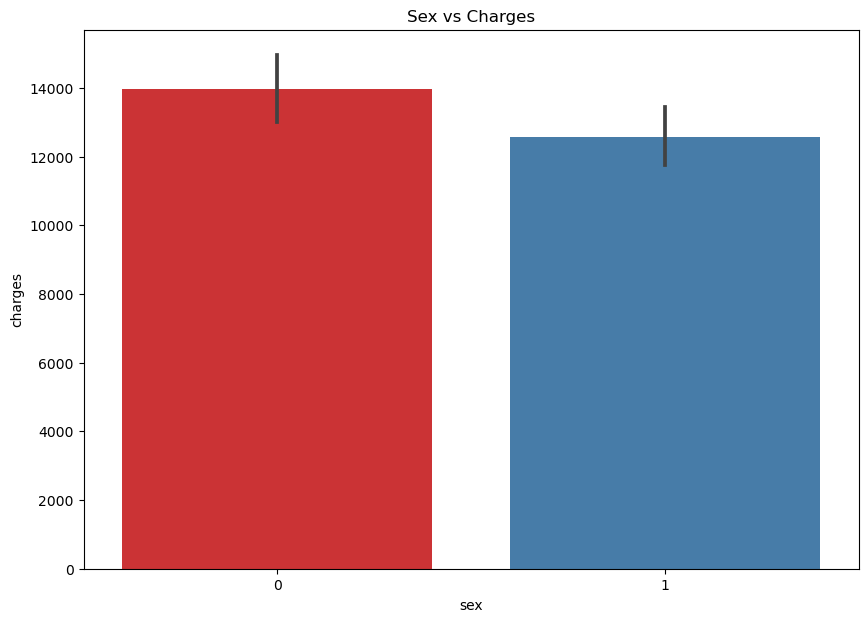

In [27]:
plt.figure(figsize=(10,7))
plt.title('Sex vs Charges')
sns.barplot(x='sex',y='charges',data=data_copy,palette='Set1')

In [28]:
print('Printing Skewness and Kurtosis for all columns')
print()
for col in list(data_copy.columns):
    print('{0} : Skewness {1:.3f} and  Kurtosis {2:.3f}'.format(col,data_copy[col].skew(),data_copy[col].kurt()))

Printing Skewness and Kurtosis for all columns

age : Skewness 0.056 and  Kurtosis -1.245
sex : Skewness 0.021 and  Kurtosis -2.003
bmi : Skewness 0.284 and  Kurtosis -0.051
children : Skewness 0.938 and  Kurtosis 0.202
smoker : Skewness 1.465 and  Kurtosis 0.146
region : Skewness -0.038 and  Kurtosis -1.329
charges : Skewness 1.516 and  Kurtosis 1.606


C:\Users\LingaAdithya\AppData\Local\Temp\ipykernel_21244\1236474692.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_copy['age'])


Text(0, 0.5, 'Count')

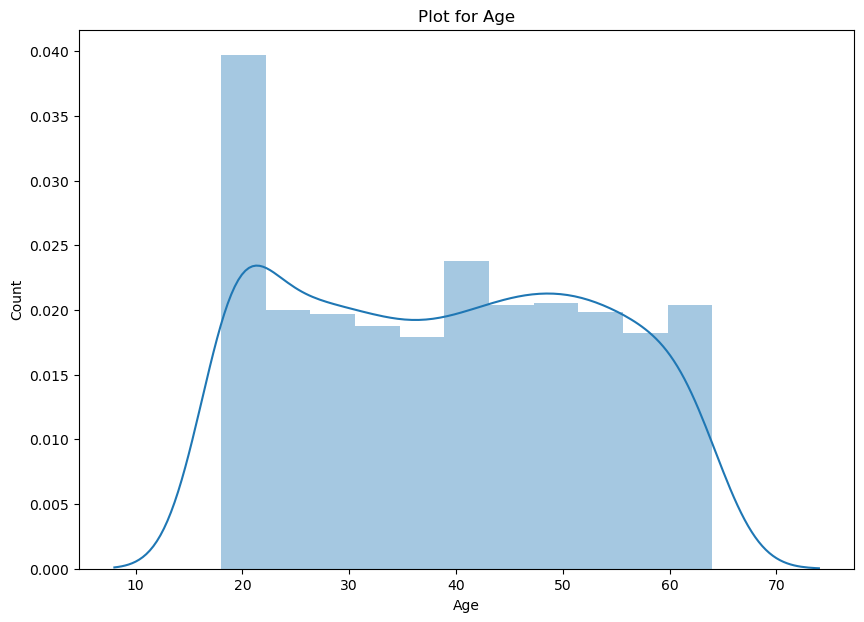

In [29]:
plt.figure(figsize=(10,7))
sns.distplot(data_copy['age'])
plt.title('Plot for Age')
plt.xlabel('Age')
plt.ylabel('Count')

C:\Users\LingaAdithya\AppData\Local\Temp\ipykernel_21244\149558255.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_copy['bmi'])


Text(0, 0.5, 'Count')

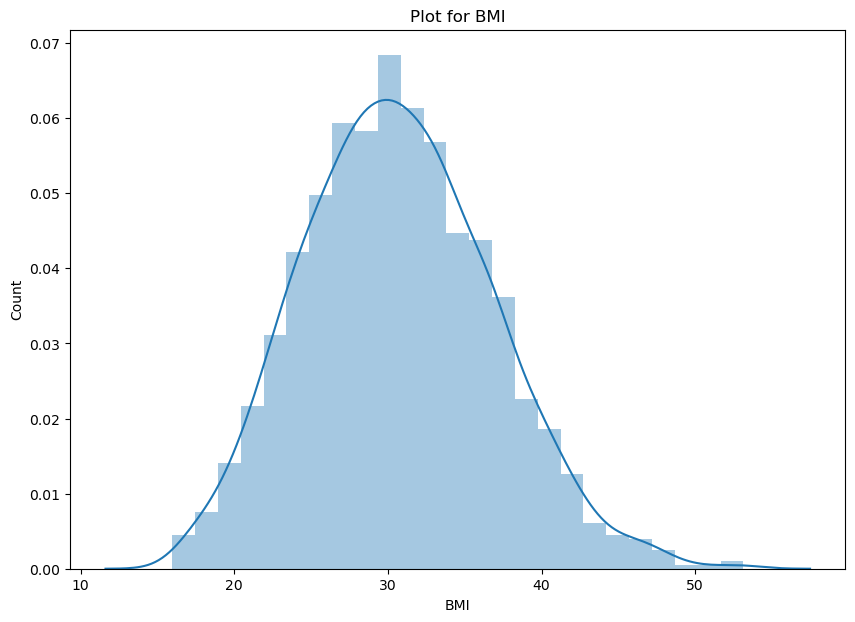

In [30]:
plt.figure(figsize=(10,7))
sns.distplot(data_copy['bmi'])
plt.title('Plot for BMI')
plt.xlabel('BMI')
plt.ylabel('Count')

C:\Users\LingaAdithya\AppData\Local\Temp\ipykernel_21244\2885443911.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_copy['charges'])


Text(0, 0.5, 'Count')

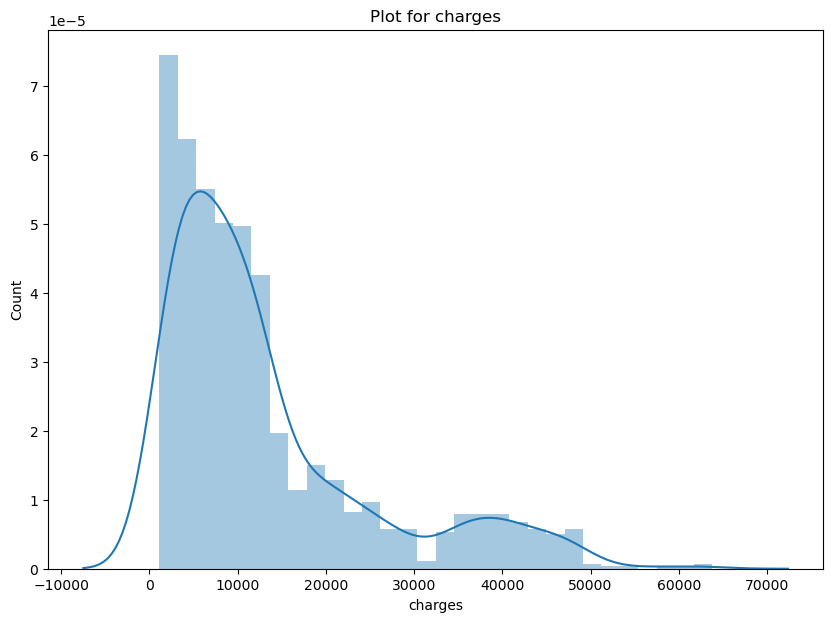

In [31]:
plt.figure(figsize=(10,7))
sns.distplot(data_copy['charges'])
plt.title('Plot for charges')
plt.xlabel('charges')
plt.ylabel('Count')

In [32]:
#Prepating data scaling BMI and Charges Column before proceeding with Prediction
from sklearn.preprocessing import StandardScaler
data_pre = data_copy.copy()

tempBmi = data_pre.bmi
tempBmi = tempBmi.values.reshape(-1,1)
data_pre['bmi'] = StandardScaler().fit_transform(tempBmi)

tempAge = data_pre.age
tempAge = tempAge.values.reshape(-1,1)
data_pre['age'] = StandardScaler().fit_transform(tempAge)

tempCharges = data_pre.charges
tempCharges = tempCharges.values.reshape(-1,1)
data_pre['charges'] = StandardScaler().fit_transform(tempCharges)

data_pre.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,1,-0.453320,0,1,3,0.298584
1,-1.509965,0,0.509621,1,0,2,-0.953689
2,-0.797954,0,0.383307,3,0,2,-0.728675
3,-0.441948,0,-1.305531,0,0,0,0.719843
4,-0.513149,0,-0.292556,0,0,0,-0.776802


In [33]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import xgboost as xgb

from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV

In [35]:
data_copy.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,0,21984.47061
4,32,0,28.880,0,0,0,3866.85520


In [36]:
X_ = data_copy.drop('charges',axis=1).values
y_ = data_copy['charges'].values.reshape(-1,1)

from sklearn.model_selection import train_test_split
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_,y_,test_size=0.2, random_state=42)

print('Size of X_train_ : ', X_train_.shape)
print('Size of y_train_ : ', y_train_.shape)
print('Size of X_test_ : ', X_test_.shape)
print('Size of Y_test_ : ', y_test_.shape)

Size of X_train_ :  (1070, 6)
Size of y_train_ :  (1070, 1)
Size of X_test_ :  (268, 6)
Size of Y_test_ :  (268, 1)


In [37]:
rf_reg = RandomForestRegressor(max_depth=50, min_samples_leaf=12, min_samples_split=7,
                       n_estimators=1200)
rf_reg.fit(X_train_, y_train_.ravel())

RandomForestRegressor(max_depth=50, min_samples_leaf=12, min_samples_split=7,
                      n_estimators=1200)

In [38]:
y_pred_rf_train_ = rf_reg.predict(X_train_)
r2_score_rf_train_ = r2_score(y_train_, y_pred_rf_train_)

y_pred_rf_test_ = rf_reg.predict(X_test_)
r2_score_rf_test_ = r2_score(y_test_, y_pred_rf_test_)

print('R2 score (train) : {0:.3f}'.format(r2_score_rf_train_))
print('R2 score (test) : {0:.3f}'.format(r2_score_rf_test_))

R2 score (train) : 0.885
R2 score (test) : 0.878


In [39]:
import pickle
Pkl_Filename = "rf_tuned.pkl"  
with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(rf_reg, file)

In [40]:
# Load the Model back from file
with open(Pkl_Filename, 'rb') as file:  
    rf_tuned_loaded = pickle.load(file)

In [41]:
rf_tuned_loaded

RandomForestRegressor(max_depth=50, min_samples_leaf=12, min_samples_split=7,
                      n_estimators=1200)

In [42]:
pred=rf_tuned_loaded.predict(np.array([20,1,28,0,1,3]).reshape(1,6))[0]

In [43]:
print('{0:.3f}'.format(pred))

19070.713


HANDLING MISSING DATA

In [44]:
df = pd.read_csv('insurance missing.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0.0,yes,southwest,16884.92400
1,18,male,33.770,1.0,no,southeast,1725.55230
2,28,male,33.000,3.0,no,southeast,4449.46200
3,33,male,22.705,0.0,no,northwest,21984.47061
4,32,male,28.880,0.0,no,northwest,3866.85520


In [45]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1334 non-null   object 
 2   bmi       1335 non-null   float64
 3   children  1334 non-null   float64
 4   smoker    1332 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1335 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB
None


In [46]:
import missingno as msno

<Axes: >

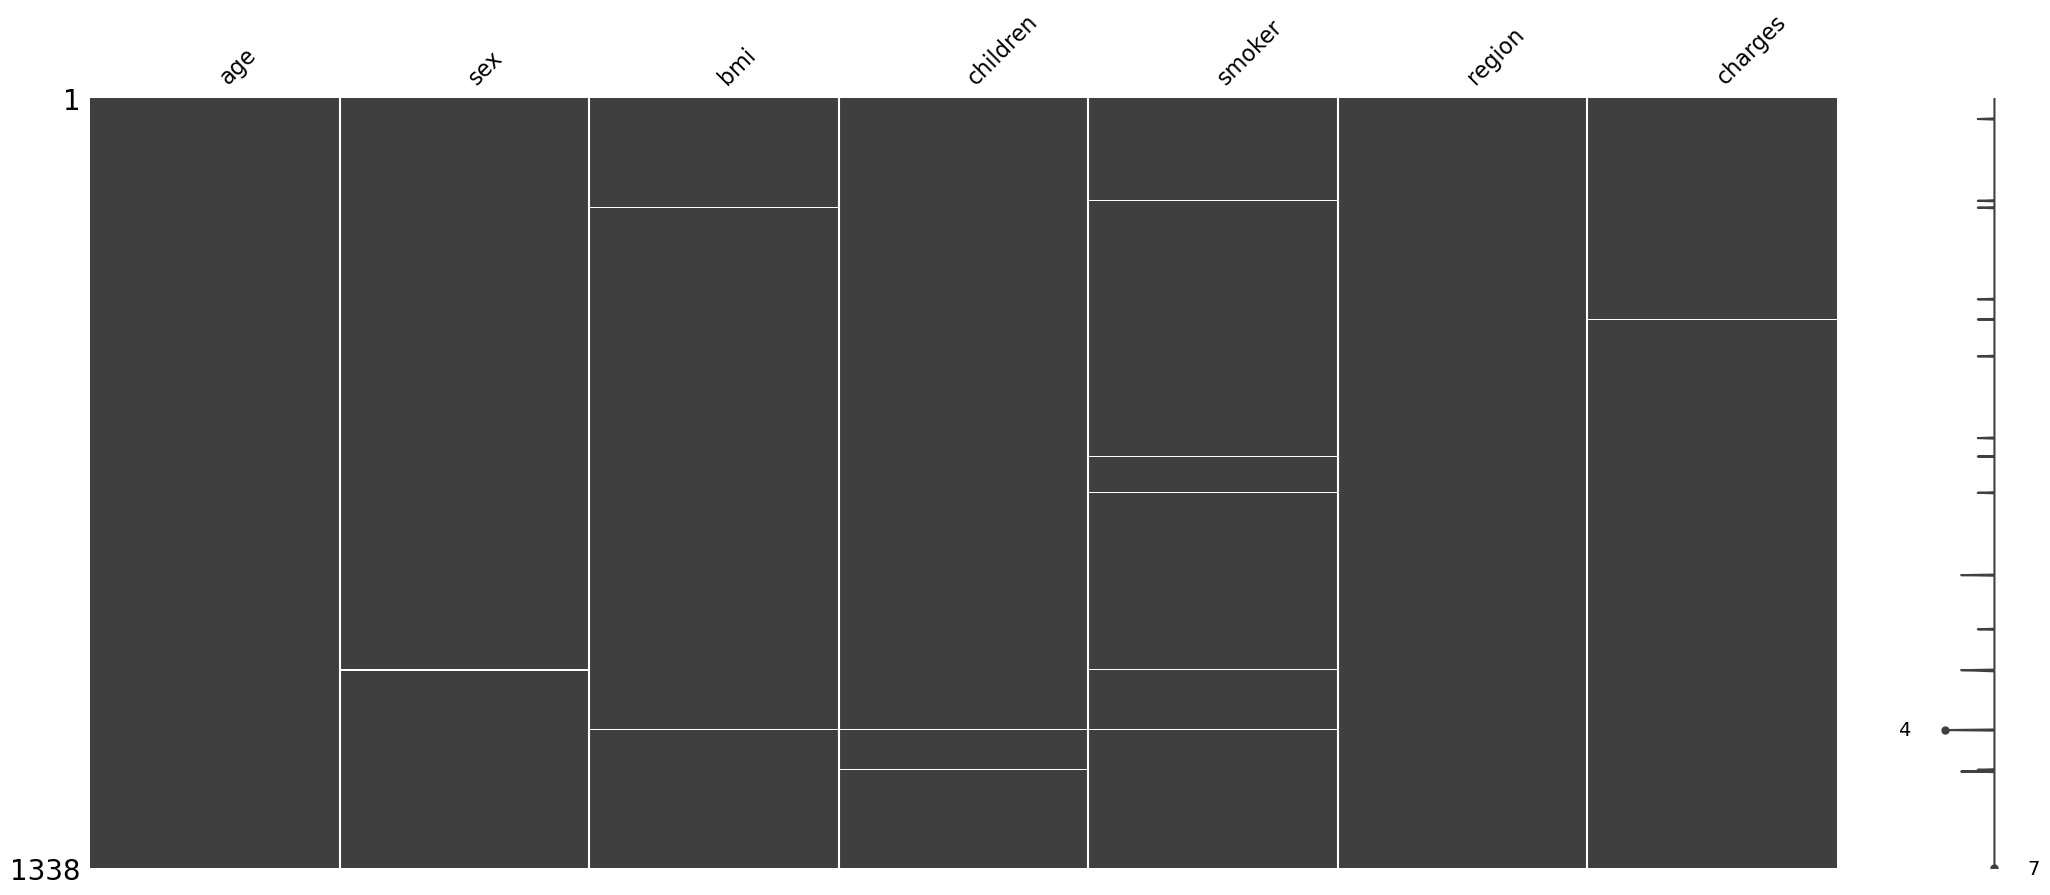

In [47]:
msno.matrix(df)

In [48]:
for col in df.columns:
    missing = df[col].isnull().sum()
    percent_missing = (missing / len(data)) * 100
    print(f"Column: {col}, Missing Values: {missing} ({percent_missing:.2f}%)")

Column: age, Missing Values: 0 (0.00%)
Column: sex, Missing Values: 4 (0.30%)
Column: bmi, Missing Values: 3 (0.22%)
Column: children, Missing Values: 4 (0.30%)
Column: smoker, Missing Values: 6 (0.45%)
Column: region, Missing Values: 1 (0.07%)
Column: charges, Missing Values: 3 (0.22%)


In [50]:
# Drop columns with high missingness (consider if data is important)
data.dropna(thresh=0.8, axis=1, inplace=True)  # Drop columns with over 80% missing values


In [51]:
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())
print(df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900       0.0    yes  southwest  16884.92400
1      18    male  33.770       1.0     no  southeast   1725.55230
2      28    male  33.000       3.0     no  southeast   4449.46200
3      33    male  22.705       0.0     no  northwest  21984.47061
4      32    male  28.880       0.0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970       3.0     no  northwest  10600.54830
1334   18  female  31.920       0.0     no  northeast   2205.98080
1335   18  female  36.850       0.0     no  southeast   1629.83350
1336   21  female  25.800       0.0     no  southwest   2007.94500
1337   61  female  29.070       0.0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [52]:
df['children'] = df['children'].fillna(df['children'].ffill())
print(df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900       0.0    yes  southwest  16884.92400
1      18    male  33.770       1.0     no  southeast   1725.55230
2      28    male  33.000       3.0     no  southeast   4449.46200
3      33    male  22.705       0.0     no  northwest  21984.47061
4      32    male  28.880       0.0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970       3.0     no  northwest  10600.54830
1334   18  female  31.920       0.0     no  northeast   2205.98080
1335   18  female  36.850       0.0     no  southeast   1629.83350
1336   21  female  25.800       0.0     no  southwest   2007.94500
1337   61  female  29.070       0.0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [53]:
df['smoker'] = df['smoker'].fillna(df['smoker'].ffill())
print(df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900       0.0    yes  southwest  16884.92400
1      18    male  33.770       1.0     no  southeast   1725.55230
2      28    male  33.000       3.0     no  southeast   4449.46200
3      33    male  22.705       0.0     no  northwest  21984.47061
4      32    male  28.880       0.0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970       3.0     no  northwest  10600.54830
1334   18  female  31.920       0.0     no  northeast   2205.98080
1335   18  female  36.850       0.0     no  southeast   1629.83350
1336   21  female  25.800       0.0     no  southwest   2007.94500
1337   61  female  29.070       0.0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [54]:
df['charges'] = df['charges'].fillna(df['charges'].mean())
print(df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900       0.0    yes  southwest  16884.92400
1      18    male  33.770       1.0     no  southeast   1725.55230
2      28    male  33.000       3.0     no  southeast   4449.46200
3      33    male  22.705       0.0     no  northwest  21984.47061
4      32    male  28.880       0.0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970       3.0     no  northwest  10600.54830
1334   18  female  31.920       0.0     no  northeast   2205.98080
1335   18  female  36.850       0.0     no  southeast   1629.83350
1336   21  female  25.800       0.0     no  southwest   2007.94500
1337   61  female  29.070       0.0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [55]:
df['region'] = df['region'].fillna(df['region'].mode()[0])
print(df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900       0.0    yes  southwest  16884.92400
1      18    male  33.770       1.0     no  southeast   1725.55230
2      28    male  33.000       3.0     no  southeast   4449.46200
3      33    male  22.705       0.0     no  northwest  21984.47061
4      32    male  28.880       0.0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970       3.0     no  northwest  10600.54830
1334   18  female  31.920       0.0     no  northeast   2205.98080
1335   18  female  36.850       0.0     no  southeast   1629.83350
1336   21  female  25.800       0.0     no  southwest   2007.94500
1337   61  female  29.070       0.0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [56]:
df['sex'] = df['sex'].fillna(df['sex'].mode()[0])
print(df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900       0.0    yes  southwest  16884.92400
1      18    male  33.770       1.0     no  southeast   1725.55230
2      28    male  33.000       3.0     no  southeast   4449.46200
3      33    male  22.705       0.0     no  northwest  21984.47061
4      32    male  28.880       0.0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970       3.0     no  northwest  10600.54830
1334   18  female  31.920       0.0     no  northeast   2205.98080
1335   18  female  36.850       0.0     no  southeast   1629.83350
1336   21  female  25.800       0.0     no  southwest   2007.94500
1337   61  female  29.070       0.0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [57]:
for col in df.columns:
    missing = df[col].isnull().sum()
    percent_missing = (missing / len(data)) * 100
    print(f"Column: {col}, Missing Values: {missing} ({percent_missing:.2f}%)")

Column: age, Missing Values: 0 (0.00%)
Column: sex, Missing Values: 0 (0.00%)
Column: bmi, Missing Values: 0 (0.00%)
Column: children, Missing Values: 0 (0.00%)
Column: smoker, Missing Values: 0 (0.00%)
Column: region, Missing Values: 0 (0.00%)
Column: charges, Missing Values: 0 (0.00%)
